# BTG Interest Form Data 

**We will look into what the student's interests are and the majors of those students. This Exploratory Data Analysis will look into qualitative features from students, such as major and year in college.**

## Package Import

In [2]:
# importing necessary packages for data manipulation
import re 
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import urllib 
import requests
%matplotlib inline
# NLP
from wordcloud import WordCloud, STOPWORDS # filtered out before and after processing natural language
from sklearn.feature_extraction.text import CountVectorizer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from PIL import Image
# Feature Importance 
from sklearn.ensemble import GradientBoostingClassifier
from yellowbrick.features.importances import FeatureImportances
# Text Similarity
from yellowbrick.text import TSNEVisualizer
from sklearn.feature_extraction.text import TfidfVectorizer

## Data Ingestion & Cleaning

In [3]:
# Understanding the responses
interest_responses = pd.read_csv("BTG Interest.csv") # added csv file into current file directory
interest_responses.sample(5)
# concatenating beginning and end of responses data
beg_end = pd.concat([interest_responses.head(),interest_responses.tail()])

In [27]:
# looking at data quality summary
interest_responses.describe()

,Year,Major,Committee Interest,Workshop Interest,Objective
count,21,21,21,21,21
unique,3,9,6,18,21
top,Freshman,Information Systems,"Web Development Committee, Data Science Committee","Project Management, Financial Modeling, Techno...","I'm interested in entrepreneurship, so I'm hop..."
freq,13,7,7,2,1


In [5]:
# We can drop unimportant values such as Name and ID as we're looking at the aggregate
for column in ("Timestamp","Full Name","Andrew ID"):
    interest_responses.drop([column],axis=1,inplace=True)

In [6]:
# Renaming Columns
interest_responses.columns = ["Year","Major","Committee Interest","Workshop Interest","Objective"]
# Assigning names to column data
Year, Major, Committee_Interest, Workshop_Interest, Objective = interest_responses["Year"],interest_responses["Major"],interest_responses["Committee Interest"],interest_responses["Workshop Interest"],interest_responses["Objective"]
# Mapping Values - only Freshmens, Sophomores, and Juniors
interest_responses["Major"] = interest_responses["Major"].replace({"Econ/Stats":"Econ/Stats","Information Systems":"Information Systems","Economics":"Econ","Statistics/ Machine Learning":"Stats/ML","ECE":"ECE","Computer Science":"CS","Prospective Information Systems":"Information Systems","Mathematics":"Math"},regex=True)
interest_responses["Major"]=interest_responses["Major"].replace({"Business Administration":"BA"},regex=True)
interest_responses["Major"]=interest_responses["Major"].replace({"Business":"Business Administration"},regex=True)
interest_responses["Major"]=interest_responses["Major"].replace({"BA":"Business Administration"},regex=True)
                                                              


In [7]:
# Cleaning the data - all sections in form required, so not expected to obtain null observations.
interest_responses.isnull().sum()[interest_responses.isnull().sum() > 0] # empty Data Series, so there 
# are no null values to clean

Series([], dtype: int64)

## Univariate/Bivariate EDA

In [12]:
def ridOfBraces(L):
    if L==[]:
        return []
    else:
        if type(L[0]) == list:
            return ridOfBraces(L[0]) + ridOfBraces(L[1:])
        else:
            return [L[0]] + ridOfBraces(L[1:])

In [13]:
# Prepare data for pie plot of the majors
L = list(set(interest_responses["Major"].unique()))
def eliminate_whitespace(L):
    for i in range(len(L)):
        L[i] = L[i].strip()
    return L
L = eliminate_whitespace(L)
majors = list(set(L))
##### count number of people in each majors 
majors_all = list(interest_responses["Major"])
group_sizes=[]
for i in range(3):
    group_sizes.append([0]*8)
committees = list(interest_responses["Committee Interest"])
for major in range(len(majors_all)):
    entry = 0
    while True:
        if majors_all[major].strip() == majors[entry].strip(): 
            break
        entry+=1
    if "product" in committees[major].lower(): group_sizes[0][entry]+=1
    if "web" in committees[major].lower(): group_sizes[1][entry]+=1
    if "data" in committees[major].lower(): group_sizes[2][entry]+=1
labels = []
group_sizes
for committee in range(3):
    labels_committee = []
    for major in range(len(majors)):
        if group_sizes[committee][major] != 0:
            labels_committee += [majors[major]]
    labels+=[labels_committee]
labels = ridOfBraces(labels)

def noZeros(L):
    for elem in range(len(L)-1,-1,-1):
        if L[elem] == 0: 
            L.pop(elem)
    return L

In [9]:
committee_by_major=[]
for i in range(8):
    committee_by_major.append([0]*3)
for major in range(len(majors_all)):
    entry = 0
    while True:
        if majors_all[major].strip() == majors[entry].strip(): 
            break
        entry+=1
    if "product" in committees[major].lower(): committee_by_major[entry][0]+=1
    if "web" in committees[major].lower(): committee_by_major[entry][1]+=1
    if "data" in committees[major].lower(): committee_by_major[entry][2]+=1
product = [row[0] for row in committee_by_major]
web = [row[1] for row in committee_by_major]
data = [row[2] for row in committee_by_major]

**The Workshops available are TensorFlow/Chatbots, Project Management, Cloud/AWS, Internet of Things (IoT), Financial Modeling, Technology Consulting, Intro to Data Science, User Experience (UX), User Interface (UI), Cybersecurity**

In [14]:
workshops = list(interest_responses["Workshop Interest"])
workshop_names = ["tensor","project","data","cloud","internet","financial","tech","user experience","user interface","cyber"]
workshop_by_major=[]
for i in range(8):
    workshop_by_major.append([0]*10)
for major in range(len(majors_all)):
    entry = 0
    while True:
        if majors_all[major].strip() == majors[entry].strip(): 
            break
        entry+=1
    for i in range(10):
        if workshop_names[i] in workshops[major].lower(): workshop_by_major[entry][i]+=1
BTG_workshops= dict()
for workshop in range(len(workshop_by_major[0])):
    workshop_col = []
    for major in range(len(workshop_by_major)):
        workshop_col += [workshop_by_major[major][workshop]]
    work_shop = workshop_names[workshop]
    BTG_workshops[work_shop]=workshop_col

In [15]:
majors_count = [0]*8
for major in range(len(majors_all)):
    entry = 0
    while True:
        if majors_all[major].strip() == majors[entry].strip(): 
            break
        entry+=1
    majors_count[entry]+=1
print(majors_count,majors)

[7, 1, 2, 5, 1, 1, 3, 1] ['Information Systems', 'Econ/Stats', 'CS', 'Business Administration', 'Stats/ML', 'ECE', 'Math', 'Econ']


In [16]:
# Committee & Workshop Interests
subgroups = [0,0,0]
for major in range(len(majors_all)):
    if "product" in committees[major].lower(): subgroups[0]+=1
    if "web" in committees[major].lower(): subgroups[1]+=1
    if "data" in committees[major].lower(): subgroups[2]+=1

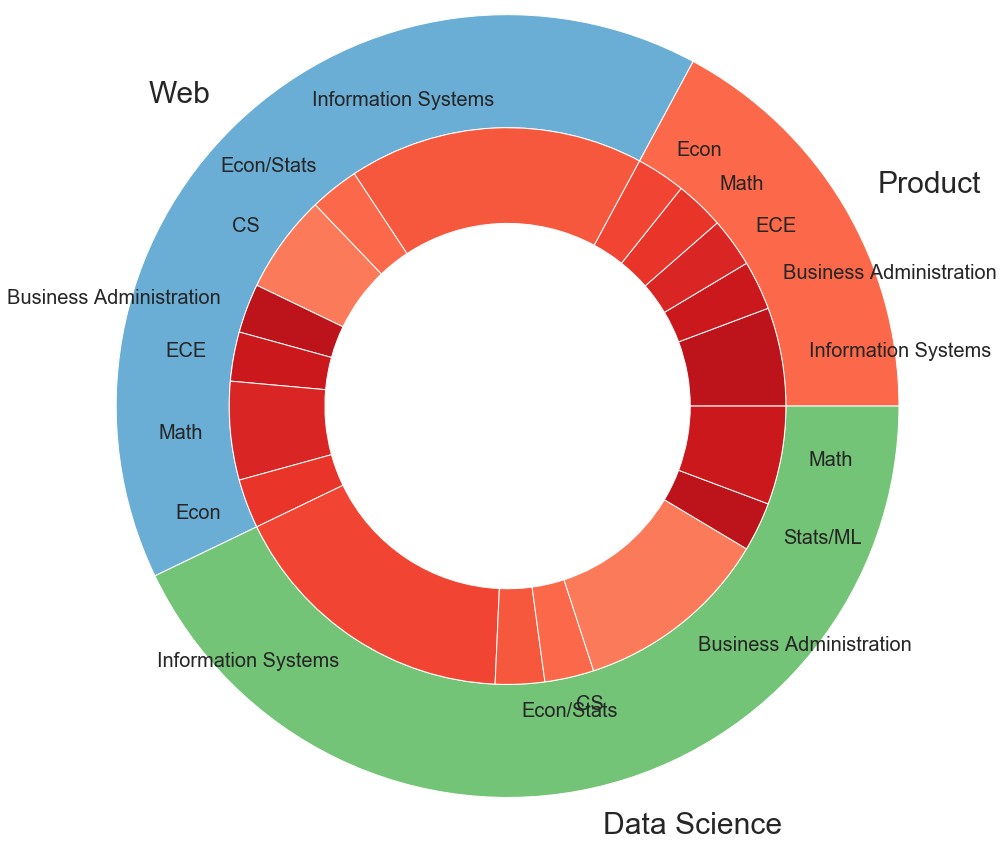

In [17]:
# Data Visualizations For Multiple Answer Q's
sns.set(color_codes = True)
def visualizerPiePlot():
    blues, reds, greens = [plt.cm.Blues, plt.cm.Reds, plt.cm.Greens]
    majors = labels # names of groups in pie plot
    subgroup_size = noZeros(ridOfBraces(group_sizes))
    committees=["Product","Web","Data Science"]
    group_size=subgroups

    fig, ax = plt.subplots()
    ax.axis('equal')
    
    
    outside_pie, _ = ax.pie(group_size, radius=4.5, labels=committees, colors=[reds(0.5), blues(0.5), greens(0.5)],textprops={'fontsize': 30})
    plt.setp(outside_pie, width=1.3, edgecolor='white')
    inside_pie, _ = ax.pie(subgroup_size, radius=4.5-1.3, labels=majors,autopct=None,colors=[reds(0.8), reds(0.75), reds(0.7), reds(0.65), reds(0.6), reds(0.55), reds(0.5), reds(0.45)], textprops={'fontsize': 20})
    plt.setp(inside_pie, width=1.1, edgecolor='white')
    #plt.margins(0,0)

def getFrequencyName(name): pass
if __name__ == "__main__":
    visualizerPiePlot()
    

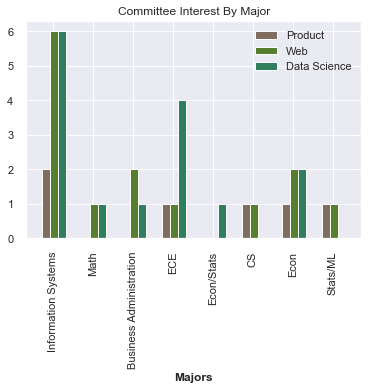

In [18]:
def visualizeBarPlots(): 
    barWidth = 0.20
    # set height of bar
    r1 = np.arange(len(product))
    r2 = [x + barWidth for x in r1]
    r3 = [x + barWidth for x in r2]
    fig, ax = plt.subplots()
    plt.bar(r1, product, color='#7f6d5f', width=barWidth, edgecolor='white', label='Product')
    plt.bar(r2, web, color='#557f2d', width=barWidth, edgecolor='white', label='Web')
    plt.bar(r3, data, color='#2d7f5e', width=barWidth, edgecolor='white', label='Data Science')
    plt.xlabel('Majors', fontweight='bold')
    plt.title("Committee Interest By Major")
    width = 0.35
    x_loc = np.arange(8)
    ax.set_xticks(x_loc + width / 2)
    ax.set_xticklabels(('Information Systems', 'Math', 'Business Administration', 'ECE', 'Econ/Stats', 'CS', 'Econ', 'Stats/ML'),rotation=90)
    plt.legend()
    plt.show()
visualizeBarPlots()

In [19]:
numbers_workshops = []
for workshop in workshop_names:
    numbers_workshops+=[sum(BTG_workshops[workshop])]
numbers_workshops

[13, 14, 15, 15, 10, 12, 13, 15, 14, 7]

In [20]:
workshop_names

['tensor',
 'project',
 'data',
 'cloud',
 'internet',
 'financial',
 'tech',
 'user experience',
 'user interface',
 'cyber']

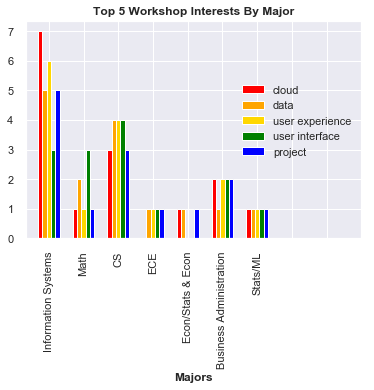

In [21]:
def visualizeBarPlots(): 
    barWidth = 0.25
    # set height of bar
    r1 = np.arange(7)
    
    r2 = [x + barWidth/2 for x in r1]
    r3 = [x + barWidth/2 for x in r2]
    r4 = [x + barWidth/2 for x in r3]
    r5 = [x + barWidth/2 for x in r4]
    r6 = [x + barWidth/2 for x in r5]
    r7 = [x + barWidth/2 for x in r6]
    r8 = [x + barWidth/2 for x in r7]
    r9 = [x + barWidth/2 for x in r8]
    r10 = [x + barWidth/2 for x in r9]
    
    cloud = [7, 1, 3, 0, 1, 2, 1]
    data = [5, 2, 4, 1, 1, 1, 1]
    user_experience = [6, 1, 4, 1, 0, 2, 1]
    user_interface = [3, 3, 4, 1, 0, 2, 1]
    project_management = [5, 1, 3, 1, 1, 2, 1]
    fig, ax = plt.subplots()
    plt.bar(r1, cloud, color="red", width=barWidth/2, edgecolor='white', label=workshop_names[3])
    plt.bar(r2, data, color='orange', width=barWidth/2, edgecolor='white', label=workshop_names[2])
    plt.bar(r3, user_experience, color='gold', width=barWidth/2, edgecolor='white', label=workshop_names[7])
    plt.bar(r4, user_interface, color='green', width=barWidth/2, edgecolor='white', label=workshop_names[8])
    plt.bar(r5, project_management, color='blue', width=barWidth/2, edgecolor='white', label=workshop_names[1])

    plt.xlabel('Majors', fontweight='bold')
    plt.title("Top 5 Workshop Interests By Major",fontweight="bold")
    width = 1.00
    x_loc = np.arange(10)
    ax.set_xticks(x_loc + barWidth)
    ax.set_xticklabels(('Information Systems', 'Math', 'CS', 'ECE','Econ/Stats & Econ',"Business Administration","Stats/ML"),rotation=90)
    plt.legend(bbox_to_anchor=(1.0,0.75))
    plt.show()
visualizeBarPlots()

(-1.1277403817095386,
 1.1013209778977597,
 -1.1009786724330157,
 1.1000466120573216)

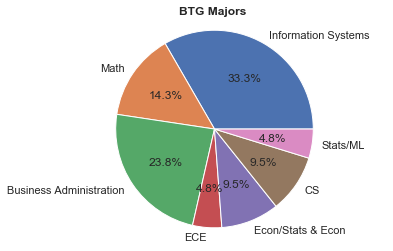

In [22]:
labels=['Information Systems', 'Math', 'Business Administration', 'ECE', 'Econ/Stats & Econ', 'CS', 'Stats/ML']
sizes = [7,3,5,1,2,2,1]
#df = pd.DataFrame({"Majors":sizes},index=labels)
#plt.legend(bbox_to_anchor=(1.25,0.75))
fig,ax1=plt.subplots()
plt.pie(sizes,explode = (0, 0, 0, 0, 0, 0, 0), labels=labels,autopct='%1.1f%%')
plt.title("BTG Majors",fontweight="bold")
ax1.axis('equal') 


In [23]:
interest_responses

,Year,Major,Committee Interest,Workshop Interest,Objective
0,Freshman,Econ/Stats,"Web Development Committee, Data Science Committee","Project Management, Financial Modeling, Techno...",More workshops on a wider range of topics
1,Sophomore,Information Systems,Data Science Committee,"TensorFlow/Chatbots, Project Management, Cloud...",Everything cool!
2,Junior,Business Administration,Data Science Committee,"TensorFlow/Chatbots, Cloud/AWS, Internet of Th...",I want to know about the technologies industry...
3,Freshman,Information Systems,"Web Development Committee, Data Science Committee","Project Management, Cloud/AWS, Internet of Thi...",I'm looking to get useful information that wil...
4,Freshman,Information Systems,"Web Development Committee, Data Science Committee","TensorFlow/Chatbots, Project Management, Cloud...",I'm looking to become exposed to web and busin...
5,Freshman,Information Systems,"Web Development Committee, Data Science Commit...","TensorFlow/Chatbots, Cloud/AWS, Internet of Th...",Networking and technical skills
6,Sophomore,CS,"Web Development Committee, Data Science Committee","TensorFlow/Chatbots, Project Management, Cloud...",I am looking to hopefully join a project and g...
7,Freshman,Information Systems,Web Development Committee,"TensorFlow/Chatbots, Project Management, Cloud...",I'd like to extend my IS education beyond my c...
8,Freshman,Information Systems,"Web Development Committee, Data Science Commit...","TensorFlow/Chatbots, Project Management, Cloud...","Getting to know more great people, learn new t..."
9,Sophomore,Econ,"Web Development Committee, Product Design Comm...","Cloud/AWS, Internet of Things (IoT), Financial...","Being exposed to new ideas, being introduced t..."


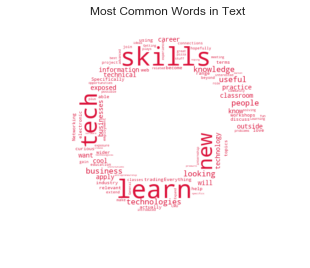

In [26]:
# Feature extraction from long answer for BTG
def cleaning_text(text): # https://www.kaggle.com/rhodiumbeng/classifying-multi-label-comments-0-9741-lb
# utilize re package as a means of substituting informal contractions with separated words
    text = text.lower()
    text = re.sub(r"what's", "what is ", text)
    text = re.sub(r"\'s", " ", text)
    text = re.sub(r"\'ve", " have ", text)
    text = re.sub(r"can't", "cannot ", text)
    text = re.sub(r"n't", " not ", text)
    text = re.sub(r"i'm", "i am ", text)
    text = re.sub(r"\'re", " are ", text)
    text = re.sub(r"\'d", " would ", text)
    text = re.sub(r"\'ll", " will ", text)
    text = re.sub(r"\'scuse", " excuse ", text)
    text = re.sub('\W', ' ', text)
    text = re.sub('\s+', ' ', text)
    text = text.strip(' ')
    return text
def unique_vocabulary(text):
    vectorizer = CountVectorizer()
    vectorizer.fit_transform(text).todense()
    return vectorizer.vocabulary_
def color_func(word, font_size, position, orientation, random_state=None,
                    **kwargs):
    return "Crimson"
def wordCloudBTG(text, mask, color = 'white'):
    word = " ".join([word for word in text.split()
                    if "<" not in word and
                     ">" not in word and
                     "-" not in word and
                     "\\" not in word])
    wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color="white",
                      width=1000,
                      height=1000,mask=mask).generate(word)
    plt.imshow(wordcloud.recolor(color_func = color_func), interpolation='bilinear')
    plt.axis('off')
    plt.title("Most Common Words in Text")
    plt.show()
def sentimentAnalyzed(data): pass
def readFile(path):
    with open(path) as f:
        content = f.read()
    return content
def main():
    responses = list(interest_responses["Objective"])
    mask = np.array(Image.open("BTG_Logo.png"))
    text = ""
    for response in responses: 
        text += " " + response
    wordCloudBTG(text, mask)
if __name__ == "__main__": 
    main()

## Future Direction

* Having looked through the data from students who filled out the business technology group interest form, we can conclude that the *most* common major is information systems, with data science being one of the most popular workshops. Looking ahead, we will be better informed on which majors are likely to be interested in which workshops contingent to the sample we have collected from the Google Form
